In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import os
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures



### 1)⽣成⼀个⼈⼯数据集。使⽤如下的三阶多项式函数来⽣成该样本的标签 
y=1.2x−3.4x2+5.6x3+5+ϵ; 其中噪声项ϵ服从均值为0、标准差为0.1的正态分布。训练数据集和测试数据集的样本数都设为100。

In [34]:
def f(x):
    return 5.6 * x**3 - 3.4*x**2 + 1.2* x + 5
data_size = 200
mean = 0
stddev = 0.1
noise = np.random.normal(mean, stddev, data_size)
x = np.linspace(-1,1, data_size)
y = np.array(list(map(f, x)) + noise)
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.5, random_state=666)
print(y.shape)

(200,)


### 2）先使⽤与数据⽣成函数同阶的三阶多项式函数拟合。

In [37]:
X = X_train.reshape(-1,1) #接下来的代码要区分好X和x
x2 = np.hstack([X,X**2]) #这里给样本X再引入1个特征项，现在的特征就有2个
x3 = np.hstack([x2,X**3])
poly_features = PolynomialFeatures(degree=3, include_bias=False)
#poly_reg.fit(x3,y_train)


#### ①打印出最佳参数的取值，与真实参数值进行对比，并对结果进行分析点评；

In [42]:
X_poly_train = poly_features.fit_transform(X_train.reshape(-1, 1))
X_poly_val =  poly_features.fit_transform(X_val.reshape(-1, 1))
sgd_reg = SGDRegressor(max_iter=1000,  penalty=None, eta0=0.3, random_state=666)
sgd_reg.fit(X_poly_train, y_train)
sgd_reg.intercept_, sgd_reg.coef_

(array([4.99715737]), array([ 1.44391113, -3.35696475,  5.19038085]))

最佳参数为[ 1.44391113, -3.35696475,  5.19038085] 4.99715737而真实参数为 [1.2,-3.4,5.6] 5 
实验表明这个模型的训练误差和在测试数据集 的误差都较低。训练出的模型参数也接近真实值。

In [11]:
def plot_learning_curves(model, X_train, X_val, y_train, y_val ):
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

#### ②尝试画出训练过程中模型分别在训练集和验证集上的学习曲线；
观察分析这2条学习曲线，判断该模型是欠拟合，还是过拟合，还是表现很好？请说明理由。

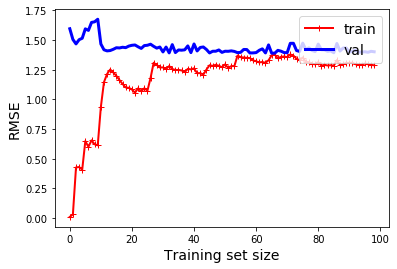

In [44]:
plot_learning_curves(sgd_reg, X_train.reshape(-1, 1), X_val.reshape(-1, 1), y_train, y_val )

根据上图的学习曲线可以观察出，整个模型趋于稳定，拟合程度、模型表现也很好

#### ③尝试使用不同的学习率η（四种情况：过大，过小，正好），画出不同的学习率η下，模型在训练集上的学习曲线；对比观察这三条学习曲线的走势，分析学习率对训练过程的影响。

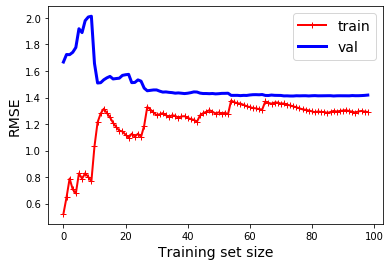

In [45]:
sgd_reg = SGDRegressor(max_iter=1000,  penalty=None, eta0=0.01, random_state=666)
plot_learning_curves(sgd_reg,  X_train.reshape(-1, 1), X_val.reshape(-1, 1), y_train, y_val)

上图是学习率过小的情况，虽然最后模型趋于稳定。但从上图可以看出模型拟合的非常缓慢，RMSE一直在下降，拟合程度还不够好

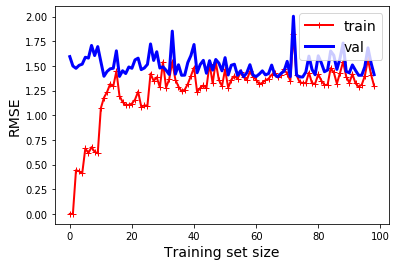

In [46]:
sgd_reg = SGDRegressor(max_iter=1000,  penalty=None, eta0=1, random_state=666)
plot_learning_curves(sgd_reg,  X_train.reshape(-1, 1), X_val.reshape(-1, 1), y_train, y_val)

上图是学习率过大的情况，可以看到模型一直在大幅度的抖动很难平稳的拟合，因为学习率过大，模型一直在损失函数的最小值左右浮动。

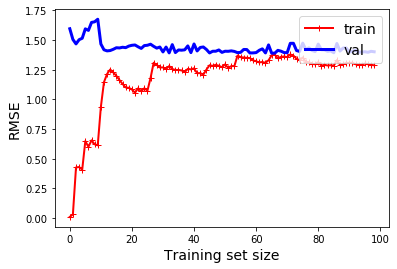

In [47]:
sgd_reg = SGDRegressor(max_iter=1000,  penalty=None, eta0=0.3, random_state=666)
plot_learning_curves(sgd_reg,  X_train.reshape(-1, 1), X_val.reshape(-1, 1), y_train, y_val)

可以看出，适当的学习率可以使得模型训练一定次数后降低损失函数的值，拟合得更好。

### 3）再试试线性函数拟合。

尝试画出训练过程中模型分别在训练集和验证集上的学习曲线；观察分析这2条学习曲线，判断该模型是欠拟合，还是过拟合，还是表现很好？请说明理由，并指出改进方案。

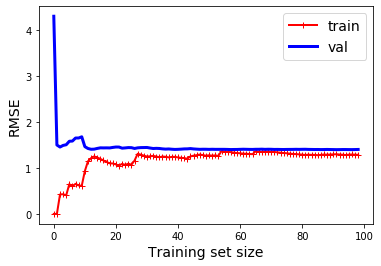

In [48]:
X = X_train.reshape(-1,1) #接下来的代码要区分好X和x
x2 = np.hstack([X,X**2]) #这里给样本X再引入1个特征项，现在的特征就有2个
x3 = np.hstack([x2,X**3])
lin_reg = LinearRegression()
lin_reg.fit(x3,y_train)
#y_predict = lin_reg.predict(x3)
#plt.scatter(x_train,y_train)
#plt.plot(np.sort(x),y_predict2[np.argsort(x)],color='r') 
#绘制的时候要注意，因为x是无序的，为了画出如下图平滑的线条，需要先将x进行排序，
#y_predict2按照x从的大小的顺序进行取值，否则绘制出的如右下图。
plot_learning_curves(lin_reg,X_train.reshape(-1, 1), X_val.reshape(-1, 1), y_train, y_val)

很明显，线性函数拟合在数据量较小的情况下，欠拟合情况十分明显。但随着数据量增大，拟合情况逐渐好转，可见数据量增大能有效克服欠拟合

### 4）使⽤三阶多项式函数模型来拟合，请注意，这次，只使⽤2个样本来训练模型。

#### ### ①打印出最佳参数的取值，并与真实参数值进行对比，并对结果进行分析点评。

In [79]:
sample_num = 2
X_train_two = X_train[:sample_num]
y_train_two = y_train[:sample_num]
# print(X_train_two)
# print(y_train_two)
poly_features_two = PolynomialFeatures(degree=3, include_bias=False)
X_poly_train_two = poly_features_two.fit_transform(X_train_two.reshape(-1, 1))
X_poly_val =  poly_features_two.fit_transform(X_val.reshape(-1, 1))
sgd_reg_two = SGDRegressor(max_iter=1000, penalty=None, eta0=0.1, random_state=666)
sgd_reg_two.fit(X_poly_train_two, y_train_two)
sgd_reg_two.intercept_, sgd_reg_two.coef_

(array([3.72119869]), array([3.11108493, 0.02978613, 1.16001015]))

只用两个样本训练的参数集与真实参数差距极大，表现非常不好

#### ②尝试画出训练过程中模型分别在训练集和验证集上的学习曲线；观察分析这2条学习曲线，判断该模型是欠拟合，还是过拟合，还是表现很好？请说明理由，并指出改进方案。

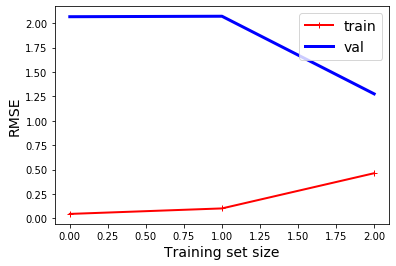

In [80]:
plot_learning_curves(sgd_reg_two, X_poly_train_two, X_poly_val, y_train_two, y_val)

从图像上看，欠拟合十分严重，增加数据量能有效改善

### 5）使⽤10阶多项式函数模型来拟合。

#### ①打印出最佳参数的取值，并与真实参数值进行对比；

In [112]:
from sklearn.pipeline import Pipeline

poly_features = PolynomialFeatures(degree=10, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train.reshape(-1, 1))
X_poly_val =  poly_features.fit_transform(X_val.reshape(-1, 1))
sgd_reg_10 = SGDRegressor(max_iter=10, tol=1000, penalty=None, eta0=0.3, random_state=666)
sgd_reg_10.fit(X_poly_train, y_train)
sgd_reg_10.intercept_, sgd_reg_10.coef_
# plot_learning_curves(polynomial_regression, X_train.reshape(-1, 1), X_val.reshape(-1, 1), y_train, y_val)



(array([4.70925063]),
 array([ 2.24895593, -1.68610917,  2.07086207, -1.12680093,  1.44288806,
        -0.58359307,  0.99628413, -0.22772573,  0.6964639 , -0.006855  ]))

可以看出十阶多项式的参数与真实参数相差甚远

#### ②尝试画出训练过程中模型分别在训练集和验证集上的学习曲线；观察分析这2条学习曲线，判断该模型是欠拟合，还是过拟合，还是表现很好？请说明理由，并指出改进方案。

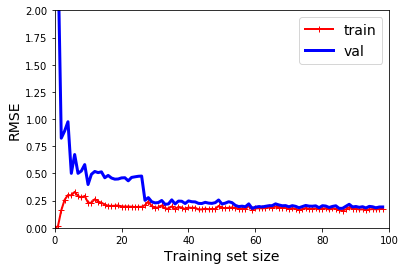

In [89]:
# lin_reg = LinearRegression()
plot_learning_curves(sgd_reg_10, X_poly_train, X_poly_val, y_train, y_val)
plt.axis([0, 100, 0, 2])  
plt.show()

很明显，10阶函数拟合在数据量较小的情况下，过拟合情况十分明显。但随着数据量增大，拟合情况转为极佳，可见数据量增大能有效克服欠拟合。
同时，减少模型复杂度也能明显降低损失函数

#### ③尝试利用L2正则化技术，让该模型的表现好起来。画出训练过程中模型分别在训练集和验证集上的学习曲线；观察分析这2条学习曲线，判断该模型是欠拟合，还是过拟合，还是表现很好？并说明理由。

[0, 100, 0, 2]

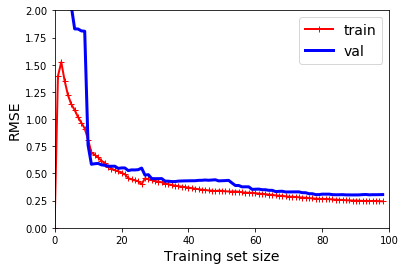

In [123]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
X_scaler_train = std_scaler.fit_transform(X_poly_train)
X_scaler_val = std_scaler.fit_transform(X_poly_val)
regul_reg = Ridge(alpha = 10)
regul_reg.fit(X_scaler_train, y_train)
plot_learning_curves(regul_reg, X_scaler_train, X_scaler_val, y_train, y_val)
plt.axis([0, 100, 0, 2])  

从图上看，加了L2正则化技术，模型验证集随着样本数增加快速拟合了训练集曲线，表现比未使用L2正则化技术快的多。
模型一开始过拟合也表现得很明显，但是随着样本数增加，快速拟合。表现比未使用正则化技术好得多

#### ④   打印出③中模型的最佳参数，并与①进行对比，尝试总结下L2正则化技术所带来的效果，并分析为何L2正则化技术可以解决过拟合问题。

In [124]:
print(regul_reg.intercept_, regul_reg.coef_)

3.926079009888312 [ 1.06573333 -0.5907858   0.89636423 -0.29418012  0.57128612 -0.11653262
  0.29439353 -0.01090919  0.07913099  0.05200823]


未使用正则化技术之前：

4.70925063 [ 2.24895593, -1.68610917,  2.07086207, -1.12680093,  1.44288806,
        -0.58359307,  0.99628413, -0.22772573,  0.6964639 , -0.006855  ]，
        
使用了正则化技术以后，模型的参数值小了很多，明显降低了模型的复杂度

#### ⑤ 在③中使用不同的正则化强度，打印出不同正则化强度下的最佳参数，并对结果进行分析点评。

In [127]:
regul_reg = Ridge(alpha = 100)
regul_reg.fit(X_scaler_train, y_train)
print("正则超参数为100时：",regul_reg.intercept_, regul_reg.coef_)
regul_reg = Ridge(alpha = 10)
regul_reg.fit(X_scaler_train, y_train)
print("正则超参数为10时：",regul_reg.intercept_, regul_reg.coef_)
regul_reg = Ridge(alpha = 1)
regul_reg.fit(X_scaler_train, y_train)
print("正则超参数为1时：",regul_reg.intercept_, regul_reg.coef_)

正则超参数为100时： 3.927234090690431 [ 0.64745398 -0.25906177  0.5749319  -0.19286369  0.47443898 -0.14160071
  0.39105213 -0.10412881  0.32540119 -0.07675766]
正则超参数为10时： 3.927234090690431 [ 1.06742894 -0.59179437  0.89527111 -0.29473018  0.57069091 -0.11647715
  0.29437504 -0.01060902  0.07947331  0.05236204]
正则超参数为1时： 3.927234090690431 [ 0.99655002 -0.84024411  1.26799846 -0.22633193  0.71165938  0.00310774
  0.18549751  0.05235867 -0.22367868  0.02199059]


从结果可以看到，alpha参数越大，参数取值越小，模型越趋于直线。